In [1]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pystan
%matplotlib inline

In [2]:
df = pd.read_csv("data/conflict.dat",encoding = "utf-8", delimiter = " ")

In [3]:
df = df.replace(['Yes', 'No'], [1, 0])

In [4]:
X = df[["a1", "a2", "a3", "a4", "a5", "a6", "a7"]]
y = df["cv"]
N = df.shape[0]
M = df.shape[1] - 1
stan_data = {'N': N, 'M':M, 'X': X, 'y': y}

In [11]:
df

,a1,a2,a3,a4,a5,a6,a7,cv
0,0,1,0,1,0,0,0,0
1,0,0,1,1,0,0,1,0
2,1,1,0,1,0,0,0,0
3,0,1,1,1,0,0,1,0
4,1,1,1,1,0,0,0,0
5,0,0,0,1,0,0,1,0
6,0,0,1,1,0,0,0,0
7,0,0,1,1,1,0,1,0
8,1,1,1,1,0,0,0,0
9,0,1,0,1,1,0,1,0


In [17]:
fit = pystan.stan(file='d.stan', data=stan_data, iter=1000, chains=3, thin=10)

ValueError: Failed to parse Stan model 'anon_model_848fe3e5b42937d940f515b44d7ebd37'. Error message:
SYNTAX ERROR, MESSAGE(S) FROM PARSER:

No matches for: 

  int ~ normal(real)

Available argument signatures for normal:

  real ~ normal(real, real)
  real ~ normal(real, real[])
  real ~ normal(real, vector)
  real ~ normal(real, row vector)
  real ~ normal(real[], real)
  real ~ normal(real[], real[])
  real ~ normal(real[], vector)
  real ~ normal(real[], row vector)
  real ~ normal(vector, real)
  real ~ normal(vector, real[])
  real ~ normal(vector, vector)
  real ~ normal(vector, row vector)
  real ~ normal(row vector, real)
  real ~ normal(row vector, real[])
  real ~ normal(row vector, vector)
  real ~ normal(row vector, row vector)
  real[] ~ normal(real, real)
  real[] ~ normal(real, real[])
  real[] ~ normal(real, vector)
  real[] ~ normal(real, row vector)
  real[] ~ normal(real[], real)
  real[] ~ normal(real[], real[])
  real[] ~ normal(real[], vector)
  real[] ~ normal(real[], row vector)
  real[] ~ normal(vector, real)
  real[] ~ normal(vector, real[])
  real[] ~ normal(vector, vector)
  real[] ~ normal(vector, row vector)
  real[] ~ normal(row vector, real)
  real[] ~ normal(row vector, real[])
  real[] ~ normal(row vector, vector)
  real[] ~ normal(row vector, row vector)
  vector ~ normal(real, real)
  vector ~ normal(real, real[])
  vector ~ normal(real, vector)
  vector ~ normal(real, row vector)
  vector ~ normal(real[], real)
  vector ~ normal(real[], real[])
  vector ~ normal(real[], vector)
  vector ~ normal(real[], row vector)
  vector ~ normal(vector, real)
  vector ~ normal(vector, real[])
  vector ~ normal(vector, vector)
  vector ~ normal(vector, row vector)
  vector ~ normal(row vector, real)
  vector ~ normal(row vector, real[])
  vector ~ normal(row vector, vector)
  vector ~ normal(row vector, row vector)
  row vector ~ normal(real, real)
  row vector ~ normal(real, real[])
  row vector ~ normal(real, vector)
  row vector ~ normal(real, row vector)
  row vector ~ normal(real[], real)
  row vector ~ normal(real[], real[])
  row vector ~ normal(real[], vector)
  row vector ~ normal(real[], row vector)
  row vector ~ normal(vector, real)
  row vector ~ normal(vector, real[])
  row vector ~ normal(vector, vector)
  row vector ~ normal(vector, row vector)
  row vector ~ normal(row vector, real)
  row vector ~ normal(row vector, real[])
  row vector ~ normal(row vector, vector)
  row vector ~ normal(row vector, row vector)


ERROR at line 14

 12:    model {
 13:    	for (i in 1:N)
 14:        y[i] ~ normal(beta0+dot_product(X[i],beta));
                                                        ^
 15:    }



In [54]:
fit

Inference for Stan model: anon_model_1f6daed07596c7181742c925d687f9f6.
3 chains, each with iter=1000; warmup=500; thin=10; 
post-warmup draws per chain=50, total post-warmup draws=150.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta0    -1.35    0.04   0.26  -1.95  -1.52  -1.33  -1.17  -0.89     44    1.0
beta[0]   1.07    0.02   0.17   0.72   0.95   1.05   1.17   1.36     46   0.99
beta[1]  -0.58    0.02   0.17  -0.94   -0.7   -0.6  -0.45  -0.27     51   0.99
beta[2]   0.13    0.02   0.17   -0.2 1.6e-3   0.15   0.24   0.44     51   0.99
beta[3]  -3.03    0.03   0.22  -3.49  -3.16  -3.01  -2.87  -2.68     45    1.0
beta[4]   1.53    0.03   0.19   1.19   1.42   1.52   1.65   1.91     51   1.01
beta[5]   5.38    0.03   0.19   5.04   5.25   5.38   5.52   5.79     50   1.01
beta[6]   0.05    0.03   0.18  -0.28  -0.06   0.06   0.19   0.39     50    1.0
lp__    -526.3     0.3   2.02 -530.9 -527.6 -526.0 -524.8 -523.3     46   1.02

Samples were drawn usin

In [71]:
la = fit.extract(permuted=True)

In [78]:
beta0 = la["beta0"]

In [90]:
beta = la["beta"]

In [91]:
df_plot = pd.DataFrame(beta)

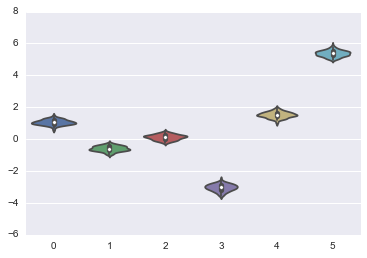

In [96]:
sns.violinplot(data=df_plot.ix[:,:5])

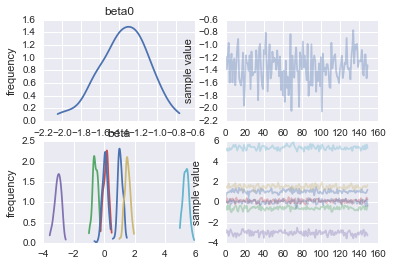

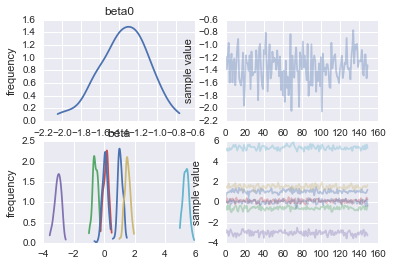

In [55]:
fit.plot()